<img src = "https://drive.google.com/uc?export=view&id=1HYrQHu1AE2cEid3BpNxo5KK3tuZF1TCo" alt = "Encabezado MLDS" width = "100%">  </img>

# **Analisis de datos**
---
Este notebook consolida el proceso del proyecto aplicado en una sola narrativa: contexto del negocio (Fase 1), limpieza y tratamiento (Fase 3), y primer analisis exploratorio (Fase 2).


## **1. Integrantes del equipo de trabajo**
---
Por favor incluya los nombres completos y numero de identificacion de los integrantes del equipo de trabajo:


1. **Gabriel Santiago Delgado Lozano C.C. 1000697520**
2. **Angel David Pineros Sierra C.C. 1000381674**
3. **Maria Alejandra Rodriguez Rios. C.C. 1000592008**


## **2. Contexto del proyecto (Integrado desde Fase 1)**
---


### **2.1. Marco de proyecto**
---
#### Trasfondo del negocio
En la ultima decada, el consumo de musica se ha desplazado de la compra de formatos fisicos o descargas hacia un modelo basado en acceso bajo demanda, donde plataformas de streaming concentran la distribucion, la monetizacion y el descubrimiento musical. Servicios como Spotify y YouTube no solo permiten reproducir canciones, sino que actuan como ecosistemas de promocion: integran algoritmos de recomendacion, listas de reproduccion, metricas de audiencia e interaccion, y canales oficiales que influyen en la visibilidad de los lanzamientos. En este contexto, entender por que ciertas canciones logran mayor alcance implica analizar tanto su desempeno en plataformas (reproducciones, vistas) como atributos tecnicos del audio, que pueden asociarse a patrones de consumo y preferencia.

Nos encontramos en el dominio de la distribucion de musica digital y el marketing musical. Con base en el dataset publico de Kaggle [Spotify and YouTube](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube), este proyecto busca explorar y analizar variables tecnicas del audio (como danceability, energy, valence, tempo, entre otras) que usualmente no se consideran de forma explicita cuando se escucha musica de manera casual. El objetivo es identificar si existe alguna relacion relevante entre estas caracteristicas musicales y el exito de una cancion, entendido principalmente como su nivel de consumo en plataformas (por ejemplo, streams en Spotify y reproducciones/vistas en YouTube).

Los principales actores que se veran beneficiados son:
- Sellos y/o distribuidoras musicales
- Artistas
- Analistas de negocios
- Melomanos

#### Alcance
Se desea implementar un analisis descriptivo y diagnostico que responda a los principales desafios del dominio: comprender que factores del contenido (atributos tecnicos del audio) y del contexto de distribucion (plataforma) se asocian con un mayor desempeno, y como se manifiestan esas diferencias en terminos de consumo. En particular, el analisis buscara:
- Identificar patrones entre audio features y metricas de consumo.
- Comparar el desempeno por track segun cada plataforma.
- Detectar distribuciones de popularidad en canciones para deteccion de one-hit wonders.
- Visualizar las tendencias de los atributos en los datos disponibles.

Los limites del proyecto estan definidos por el alcance del dataset: se trabajara unicamente con los registros y variables disponibles en el conjunto de datos, el cual contiene informacion recolectada hasta el 7 de febrero de 2023.

Como producto final, la persona beneficiaria podra disponer de un reporte o dashboard orientado a la toma de decisiones, util para preguntas como: que plataforma priorizar segun el desempeno observado, que caracteristicas tecnicas tienden a asociarse con mayor exito, y si existe alguna diferencia relevante cuando una cancion cuenta o no con video oficial en YouTube.


### **2.2. Plan de trabajo y seguimiento**
---
Para realizar el plan de trabajo se integra un checklist basado en CRISP-DM para seguimiento por entregas. En esta version de Fase 4 se deja un flujo local (sin dependencia obligatoria de Google Drive) para poder registrar actividades, visualizar progreso y exportar reportes de avance.


In [8]:
from google.colab import drive
from datetime import datetime, timedelta
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/checklist_CRISP_DM.xlsx'


Mounted at /content/drive


In [9]:
hoy = datetime.today()
miercoles = []
fecha = hoy

while len(miercoles) < 4:
    if fecha.weekday() == 2:  # Miércoles
        miercoles.append(fecha.date())
    fecha += timedelta(days=1)

# Tareas base de seguimiento por fase
tareas = [
    (1, 'Fase 1', 'Entendimiento del negocio', 'Redactar marco del proyecto', 'Por asignar', miercoles[0], False),
    (1, 'Fase 1', 'Entendimiento del negocio', 'Definir alcance y actores', 'Por asignar', miercoles[0], False),
    (2, 'Fase 2', 'Entendimiento de los datos', 'Analisis exploratorio inicial', 'Por asignar', miercoles[1], False),
    (2, 'Fase 2', 'Entendimiento de los datos', 'Estadistica descriptiva', 'Por asignar', miercoles[1], False),
    (3, 'Fase 3', 'Preparacion de datos', 'Tratar faltantes, duplicados y atipicos', 'Por asignar', miercoles[2], False),
    (3, 'Fase 3', 'Preparacion de datos', 'Seleccion de variables de analisis', 'Por asignar', miercoles[2], False),
    (4, 'Fase 4', 'Analisis de datos', 'Correlaciones y relaciones entre variables', 'Por asignar', miercoles[3], False),
    (4, 'Fase 4', 'Analisis de datos', 'Conclusiones y recomendaciones', 'Por asignar', miercoles[3], False),
]

cols = ['Entrega', 'Fase', 'Unidad', 'Tarea', 'Responsable', 'Fecha_limite', 'Hecho']
df_plan = pd.DataFrame(tareas, columns=cols)
df_plan


,Entrega,Fase,Unidad,Tarea,Responsable,Fecha_limite,Hecho
0,1,Fase 1,Entendimiento del negocio,Redactar marco del proyecto,Por asignar,2026-03-04,False
1,1,Fase 1,Entendimiento del negocio,Definir alcance y actores,Por asignar,2026-03-04,False
2,2,Fase 2,Entendimiento de los datos,Analisis exploratorio inicial,Por asignar,2026-03-11,False
3,2,Fase 2,Entendimiento de los datos,Estadistica descriptiva,Por asignar,2026-03-11,False
4,3,Fase 3,Preparacion de datos,"Tratar faltantes, duplicados y atipicos",Por asignar,2026-03-18,False
5,3,Fase 3,Preparacion de datos,Seleccion de variables de analisis,Por asignar,2026-03-18,False
6,4,Fase 4,Analisis de datos,Correlaciones y relaciones entre variables,Por asignar,2026-03-25,False
7,4,Fase 4,Analisis de datos,Conclusiones y recomendaciones,Por asignar,2026-03-25,False


In [10]:
# Visualizacion opcional del checklist con barras de progreso

def mostrar_entrega(df_entrega, num_entrega):
    titulo = widgets.HTML(f'<h4>Entrega {num_entrega}</h4>')
    items = []
    for _, row in df_entrega.iterrows():
        cb = widgets.Checkbox(value=bool(row['Hecho']), description=row['Tarea'], indent=False)
        items.append(cb)
    display(titulo, widgets.VBox(items))

for entrega in sorted(df_plan['Entrega'].unique()):
    sub = df_plan[df_plan['Entrega'] == entrega]
    progreso = int(sub['Hecho'].mean() * 100)
    barra = widgets.IntProgress(value=progreso, min=0, max=100, description=f'Entrega {entrega}')
    display(barra)

for entrega in sorted(df_plan['Entrega'].unique()):
    mostrar_entrega(df_plan[df_plan['Entrega'] == entrega], entrega)


IntProgress(value=0, description='Entrega 1')

IntProgress(value=0, description='Entrega 2')

IntProgress(value=0, description='Entrega 3')

IntProgress(value=0, description='Entrega 4')

HTML(value='<h4>Entrega 1</h4>')

HTML(value='<h4>Entrega 2</h4>')

HTML(value='<h4>Entrega 3</h4>')

HTML(value='<h4>Entrega 4</h4>')

In [11]:
# Exportables locales (opcional)
out_dir = Path('AVD/Proyecto/seguimiento')
out_dir.mkdir(parents=True, exist_ok=True)

(df_plan[df_plan['Hecho'] == True]
 .to_excel(out_dir / 'avance_proyecto.xlsx', index=False))

resumen = df_plan.groupby('Entrega', as_index=False)['Hecho'].mean()
resumen['Progreso_pct'] = resumen['Hecho'] * 100
resumen.to_excel(out_dir / 'resumen_entregas.xlsx', index=False)

print(f'Exportables generados en: {out_dir.resolve()}')


Exportables generados en: /content/AVD/Proyecto/seguimiento


Como apoyo adicional para seguimiento del equipo, puede mantenerse un checklist externo en Notion u otra herramienta de gestion de tareas. En este notebook se deja la version local para asegurar trazabilidad dentro del proyecto.


### **2.3. Datos**
---
El dataset cuenta con un total aproximado de 20.700 registros, correspondientes a canciones, cada una descrita mediante 26 variables. Para facilitar su comprension, las variables se agrupan en distintas categorias segun el tipo de informacion que aportan sobre la cancion. Las descripciones fueron extraidas directamente de la carta de datos del dataset en Kaggle.

La primera categoria corresponde a las variables de identificacion, las cuales permiten reconocer y vincular cada cancion dentro del conjunto de datos. Estas variables son de tipo categorico y no aportan directamente al analisis tecnico del audio:

- `Track`: Nombre de la cancion.
- `Artist`: Artista de la cancion.
- `Url_spotify`: URL para acceder al contenido en Spotify.
- `Uri`: Codigo utilizado para acceder a la cancion mediante la API.
- `Url_youtube`: URL para acceder a la cancion en YouTube.
- `Title`: Titulo del video de la cancion.
- `Channel`: Canal de YouTube.
- `Description`: Descripcion del video en YouTube.
- `Licensed`: Indica si el contenido esta licenciado.
- `official_video`: Variable booleana que indica si la URL de YouTube corresponde al video oficial.

La segunda categoria corresponde a las variables tecnicas, que describen aspectos musicales y acusticos. Estas variables son numericas:

- `Danceability`: Que tan adecuada es la cancion para bailar (0.0 a 1.0).
- `Energy`: Intensidad y nivel de actividad percibidos (0.0 a 1.0).
- `Key`: Tonalidad musical codificada; `-1` indica tonalidad no detectada.
- `Loudness`: Volumen promedio en decibelios (dB).
- `Speechiness`: Presencia de palabras habladas.
- `Acousticness`: Grado de certeza de que la cancion sea acustica.
- `Instrumentalness`: Probabilidad de ausencia de voz.
- `Liveness`: Probabilidad de interpretacion en vivo.
- `Valence`: Caracte emocional positivo de la cancion (0.0 a 1.0).
- `Tempo`: Tempo estimado en pulsos por minuto (BPM).
- `Duration_ms`: Duracion total en milisegundos.

La tercera categoria corresponde a variables de popularidad, que reflejan consumo y respuesta del publico:

- `Stream`: Cantidad de reproducciones en Spotify.
- `Views`: Numero de vistas en YouTube.
- `Comments`: Cantidad de comentarios en YouTube.


### **2.4. Origen y consideraciones de calidad**
---
Como se menciono anteriormente, los datos correspondientes a la informacion general de las canciones provienen de Spotify y YouTube. En cuanto a los datos tecnicos, estos presentan mayor complejidad y deben interpretarse con cierto grado de cautela. Las variables de identificacion y popularidad no presentan inconvenientes relevantes, ya que corresponden a informacion publica y verificable mediante herramientas en linea.

Sin embargo, en foros de Kaggle se menciona que existen casos en los que el video oficial o el canal oficial de una cancion presenta menos visualizaciones que versiones no oficiales. Adicionalmente, aunque las descripciones de las variables tecnicas indican que factores se consideraron para su calculo, el dataset no documenta de manera detallada el proceso exacto mediante el cual dichas variables fueron derivadas. A pesar de ello, el dataset es considerado robusto, y se estima que el proceso de limpieza requerido sera minimo.


## **3. Limpieza y tratamiento de datos (Fase 3)**
---
En esta seccion se integrara el flujo de preparacion de datos construido en la Fase 3:
- Valores faltantes.
- Duplicados y consolidacion por track/artista.
- Valores atipicos e inconsistencias.
- Seleccion final de variables para analisis.


### **3.0. Importacion de librerias y carga de datos**
---
Se carga la misma fuente de datos usada en la Fase 3 para asegurar consistencia en todo el pipeline de limpieza.


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


# Carga del dataset (misma fuente usada en fase 2)
url = "https://raw.githubusercontent.com/gdelgadol/MLDS-Modulo1-Proyecto/refs/heads/main/Spotify_Youtube.csv"
data_musica = pd.read_csv(url)

# Eliminamos columnas no analíticas (IDs/URLs/texto libre)
cols_drop = [
    "Unnamed: 0", "Url_spotify", "Uri", "Url_youtube", "Description", "Title"
]
# Algunas columnas pueden no existir según la versión del CSV; filtramos con errors='ignore'
data_musica.drop(columns=cols_drop, inplace=True, errors='ignore')from IPython.display import display


### **3.1. Valores faltantes**
---
Al encontrarnos con valores faltantes en el conjunto de datos, es crucial preguntarse:
* ¿Cómo afectan estos valores a la integridad y representatividad de la información?
* ¿Cómo se identificaron los valores faltantes en el conjunto de datos?
* ¿Cuáles fueron los criterios para decidir si rellenar con valores estimados o eliminar los valores faltantes? En caso que aplique, ¿qué método de relleno se utilizó y por qué se consideró apropiado?
* ¿Se realizó un análisis de la distribución de los valores faltantes en relación con las variables clave? Por ejemplo, si hay valores faltantes en una variable crítica, ¿cómo podría afectar la interpretación de los resultados?


En esta etapa se identifican y gestionan los valores faltantes para garantizar la consistencia del conjunto de datos. 
Dado que en la fase 2 se observó que el porcentaje de nulos era reducido y que las variables críticas 
(métricas de interacción y atributos técnicos) no admiten imputaciones confiables sin introducir sesgos, 
se opta por eliminar filas con valores nulos. Esto asegura que las comparaciones entre canciones se realicen 
sobre información completa y homogénea.



In [77]:

# Diagnóstico de valores faltantes
print("Nulos por columna (antes):")
print(data_musica.isnull().sum())
print("")
print("Total filas (antes):", data_musica.shape[0])

# Eliminamos filas con nulos (bajo impacto y coherente con fase 2)
data_musica.dropna(inplace=True)

print("")
print("Total filas (después):", data_musica.shape[0])
print("Nulos totales (después):", data_musica.isnull().sum().sum())


Nulos por columna (antes):
Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64

Total filas (antes): 20718

Total filas (después): 19549
Nulos totales (después): 0


### **3.2. Valores duplicados**
----
Ante la presencia de valores duplicados, es esencial reflexionar sobre su impacto en los resultados.

* ¿Cómo se identificaron y manejaron los valores duplicados en el conjunto de datos?
* ¿Hubo alguna consideración especial al tratar duplicados en función de ciertas variables?
* ¿Pueden estos duplicados sesgar el análisis, y en qué medida?
* ¿Se justifica la eliminación de duplicados para mantener la coherencia y singularidad de los datos?
* ¿Cómo se aseguró de que la eliminación de duplicados no afectara negativamente la representación del conjunto de datos?

La identificación y eliminación de duplicados busca asegurar que cada registro aporte información única y valiosa.


En este conjunto es normal encontrar registros repetidos porque una canción puede aparecer en distintos formatos (álbum, single) y también por colaboraciones entre artistas. Por eso en este punto primero se crea `df_artistas` desde `data_musica` (antes de deduplicar canciones), y después se consolida la vista por canción/artista en `df_canciones` para controlar duplicados por formato.



In [78]:
# 1) Duplicados exactos (todas las columnas iguales)
print("Duplicados exactos:", data_musica.duplicated().sum())

# 2) Normalización mínima de texto para comparar correctamente
for col in ["Artist", "Track"]:
    if col in data_musica.columns:
        data_musica[col] = data_musica[col].astype(str).str.strip()
        data_musica[col] = data_musica[col].str.lower().str.capitalize()

# 2.1) Etiqueta de popularidad (como en fase 2) sobre el dataset base
if 'Views' in data_musica.columns:
    labels = ['Bajo Impacto', 'Medio', 'Hit', 'Mega-Hit']
    data_musica['Popularity_Class'] = pd.qcut(
        data_musica['Views'], q=4, labels=labels, duplicates='drop'
    )
    print('Distribución Popularity_Class (base por Views):')
    print(data_musica['Popularity_Class'].value_counts(dropna=False))

# 3) Crear primero el dataset por artista (antes de procesar duplicados de canciones)
agg_artist = {
    'Track': 'count',
    'Stream': 'sum',
    'Views': 'sum',
    'Likes': 'sum',
    'Danceability': 'mean',
    'Energy': 'mean'
}

if 'Popularity_Class' in data_musica.columns:
    agg_artist['Popularity_Class'] = lambda x: x.mode()[0] if not x.mode().empty else 'N/A'

if 'Artist' in data_musica.columns:
    # Usamos data_musica para no perder incidencias por artista
    df_artistas = data_musica.groupby('Artist').agg(agg_artist).reset_index()
else:
    df_artistas = data_musica.copy()

if 'Track' in df_artistas.columns:
    df_artistas.rename(columns={'Track': 'Song_Count'}, inplace=True)
if 'Stream' in df_artistas.columns:
    df_artistas = df_artistas.sort_values(by='Stream', ascending=False)

print(f"Dataset de Artistas: {df_artistas.shape[0]} artistas únicos.")

# 4) Consolidación por canción y artista (duplicados por formato)
#    - Sumamos Views/Stream/Likes SOLO si difieren entre ocurrencias
#    - Conservamos la fila con mayor impacto como base
sum_cols = [c for c in ["Views", "Stream", "Likes"] if c in data_musica.columns]

if sum_cols:
    data_musica['_impact_score'] = data_musica[sum_cols].fillna(0).sum(axis=1)
else:
    data_musica['_impact_score'] = 0

key_cols = [c for c in ["Track", "Artist"] if c in data_musica.columns]

if key_cols and sum_cols:
    def agg_group(g):
        base = g.loc[g['_impact_score'].idxmax()].copy()
        for c in sum_cols:
            if g[c].nunique(dropna=False) > 1:
                base[c] = g[c].sum()
            else:
                base[c] = g[c].iloc[0]
        return base

    df_canciones = (
        data_musica
        .groupby(key_cols, as_index=False)
        .apply(agg_group)
        .reset_index(drop=True)
    )
else:
    df_canciones = data_musica.copy()

# Recalcular etiqueta de popularidad sobre canciones consolidadas
if 'Stream' in df_canciones.columns:
    labels = ['Bajo Impacto', 'Medio', 'Hit', 'Mega-Hit']
    df_canciones['Popularity_Class'] = pd.qcut(
        df_canciones['Stream'], q=4, labels=labels, duplicates='drop'
    )
    print('Distribución Popularity_Class (canciones por Stream):')
    print(df_canciones['Popularity_Class'].value_counts(dropna=False))

# Limpiar columna auxiliar
if '_impact_score' in df_canciones.columns:
    df_canciones.drop(columns=['_impact_score'], inplace=True)
if '_impact_score' in data_musica.columns:
    data_musica.drop(columns=['_impact_score'], inplace=True)

print(f"Dataset de Canciones (Track+Artist): {df_canciones.shape[0]} filas únicas.")

# 5) Muestras rápidas
display(df_canciones.head())
display(df_artistas.head())



Duplicados exactos: 0
Distribución Popularity_Class (base por Views):
Popularity_Class
Bajo Impacto    4888
Medio           4887
Hit             4887
Mega-Hit        4887
Name: count, dtype: int64
Dataset de Artistas: 2040 artistas únicos.
Distribución Popularity_Class (canciones por Stream):
Popularity_Class
Bajo Impacto    4866
Medio           4866
Mega-Hit        4866
Hit             4865
Name: count, dtype: int64
Dataset de Canciones (Track+Artist): 19463 filas únicas.


/tmp/ipython-input-1803/3466457517.py:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(agg_group)


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream,Popularity_Class
0,Coez,!ly (feat. coez),c@ra++ere s?ec!@le,album,0.765,0.726,7.0,-5.260,0.0505,0.24000,...,126.556,206495.0,thaSupremeVEVO,5914604.0,44532.0,814.0,True,True,26314102.0,Medio
1,Thasup,!ly (feat. coez),c@ra++ere s?ec!@le,album,0.765,0.726,7.0,-5.260,0.0505,0.24000,...,126.556,206495.0,thaSupremeVEVO,5914198.0,44528.0,814.0,True,True,26314102.0,Medio
2,Colby o'donis,#1 - colby o'donis remix,#1 (Colby O'Donis Remix),single,0.762,0.864,7.0,-4.686,0.2620,0.09140,...,90.026,137528.0,ColbyODonisVEVO,50109737.0,319099.0,12359.0,True,True,561794.0,Bajo Impacto
3,Aphex twin,#3,Selected Ambient Works Volume II,album,0.167,0.071,6.0,-27.108,0.0410,0.91100,...,143.315,464293.0,"Hi, I'm Ben.",18316658.0,157657.0,3262.0,False,False,45002482.0,Medio
4,Dave matthews band,#41,Crash,album,0.577,0.726,4.0,-8.011,0.0299,0.00199,...,107.416,399800.0,davematthewsbandVEVO,4160936.0,20527.0,1248.0,True,True,34528391.0,Medio


,Artist,Song_Count,Stream,Views,Likes,Danceability,Energy,Popularity_Class
1487,Post malone,10,1.525126e+10,6.394420e+09,53974744.0,0.669300,0.635000,Mega-Hit
526,Ed sheeran,10,1.439488e+10,1.546021e+10,83543319.0,0.713600,0.608900,Mega-Hit
508,Dua lipa,10,1.340808e+10,8.216339e+09,62627677.0,0.746900,0.734700,Mega-Hit
1844,The weeknd,9,1.246428e+10,6.859509e+09,47299512.0,0.578556,0.639333,Mega-Hit
923,Justin bieber,10,1.209777e+10,1.099106e+10,78584348.0,0.646800,0.600300,Mega-Hit


In [79]:
# Ejemplos: tracks consolidados (antes vs después) por Track+Artist
if 'Track' in data_musica.columns and 'Artist' in data_musica.columns:
    dup_keys = (
        data_musica.groupby(['Track','Artist']).size()
        .loc[lambda s: s > 1]
        .index
        .tolist()
    )
else:
    dup_keys = []

print("Duplicados Track+Artist encontrados:", len(dup_keys))

# Muestra aleatoria: 3 ejemplos
sample_keys = random.sample(dup_keys, k=min(3, len(dup_keys))) if dup_keys else []
for track, artist in sample_keys:
    print("")
    print("=== Track:", track, "| Artist:", artist, "===")
    cols_show = [c for c in ['Track','Artist','Album','Album_type','Channel','Views','Stream','Likes'] if c in data_musica.columns]
    display(data_musica[(data_musica['Track'] == track) & (data_musica['Artist'] == artist)][cols_show])
    print("")
    print("Consolidado:")
    display(df_canciones[(df_canciones['Track'] == track) & (df_canciones['Artist'] == artist)][cols_show])

# Muestra adicional: un caso donde Views/Likes son iguales (no se suman)
print("Ejemplo con métricas iguales (no se suman):")
case_equal = None
for track, artist in dup_keys:
    g = data_musica[(data_musica['Track'] == track) & (data_musica['Artist'] == artist)]
    if 'Views' in g.columns and 'Likes' in g.columns:
        if g['Views'].nunique(dropna=False) == 1 and g['Likes'].nunique(dropna=False) == 1:
            case_equal = (track, artist)
            break

if case_equal:
    track, artist = case_equal
    cols_show = [c for c in ['Track','Artist','Album','Album_type','Channel','Views','Stream','Likes'] if c in data_musica.columns]
    display(data_musica[(data_musica['Track'] == track) & (data_musica['Artist'] == artist)][cols_show])
    print("Consolidado (sin suma en Views/Likes):")
    display(df_canciones[(df_canciones['Track'] == track) & (df_canciones['Artist'] == artist)][cols_show])
else:
    print("No se encontró un caso con Views/Likes iguales en la muestra.")


Duplicados Track+Artist encontrados: 84

=== Track: Mi héroe | Artist: Antonio orozco ===


,Track,Artist,Album,Album_type,Channel,Views,Stream,Likes
6776,Mi héroe,Antonio orozco,Destino,album,AntonioOrozcoVEVO,47765726.0,39893512.0,207224.0
6778,Mi héroe,Antonio orozco,Mi Héroe,single,AntonioOrozcoVEVO,47765726.0,1605892.0,207224.0



Consolidado:


,Track,Artist,Album,Album_type,Channel,Views,Stream,Likes
10626,Mi héroe,Antonio orozco,Destino,album,AntonioOrozcoVEVO,47765726.0,41499404.0,207224.0



=== Track: Sin cadenas | Artist: Los pericos ===


,Track,Artist,Album,Album_type,Channel,Views,Stream,Likes
6707,Sin cadenas,Los pericos,Mystic Love (Reissue),album,LosPericosVEVO,23098365.0,13549639.0,67519.0
6710,Sin cadenas,Los pericos,Pericos & Friends,album,LosPericosVEVO,23098365.0,25385224.0,67519.0



Consolidado:


,Track,Artist,Album,Album_type,Channel,Views,Stream,Likes
14793,Sin cadenas,Los pericos,Pericos & Friends,album,LosPericosVEVO,23098365.0,38934863.0,67519.0



=== Track: Give peace a chance - ultimate mix | Artist: Yoko ono ===


,Track,Artist,Album,Album_type,Channel,Views,Stream,Likes
9091,Give peace a chance - ultimate mix,Yoko ono,Plastic Ono Band (The Ultimate Collection),album,johnlennon,6930517.0,1576061.0,100151.0
9092,Give peace a chance - ultimate mix,Yoko ono,GIMME SOME TRUTH. (Deluxe),album,johnlennon,6930517.0,1616834.0,100151.0



Consolidado:


,Track,Artist,Album,Album_type,Channel,Views,Stream,Likes
6222,Give peace a chance - ultimate mix,Yoko ono,GIMME SOME TRUTH. (Deluxe),album,johnlennon,6930517.0,3192895.0,100151.0


Ejemplo con métricas iguales (no se suman):


,Track,Artist,Album,Album_type,Channel,Views,Stream,Likes
7071,(don't fear) the reaper,Blue öyster cult,Agents Of Fortune,album,BlueOysterCultVEVO,59838390.0,441277003.0,537094.0
7078,(don't fear) the reaper,Blue öyster cult,Super 20 - Rockhits,compilation,BlueOysterCultVEVO,59838390.0,21305089.0,537094.0


Consolidado (sin suma en Views/Likes):


,Track,Artist,Album,Album_type,Channel,Views,Stream,Likes
11,(don't fear) the reaper,Blue öyster cult,Agents Of Fortune,album,BlueOysterCultVEVO,59838390.0,462582092.0,537094.0


### **3.3. Valores atipicos**
---
Al abordar valores atípicos, es relevante cuestionarse sobre la naturaleza de estos puntos extremos.
* ¿Son errores de medición o representan información válida pero excepcional?
* ¿Qué criterios o técnicas se utilizaron para identificar los valores atípicos?
* ¿Se aplicaron métodos estadísticos o visuales para detectar los valores atípicos?
* ¿Cuál fue la decisión final sobre cómo tratar los valores atípicos y por qué?

La elección entre eliminar o transformar estos valores debe basarse en su influencia en la distribución y la interpretación de los resultados, asegurando que el análisis refleje de manera precisa la realidad del conjunto de datos.


Los valores atípicos están asociados a **hits reales** (canciones que rompieron récords o que son concurridamente reproducidas), 
por lo que no se eliminan. Para reducir el sesgo y facilitar la comparación, se utiliza una transformación 
logarítmica sobre las métricas de popularidad.



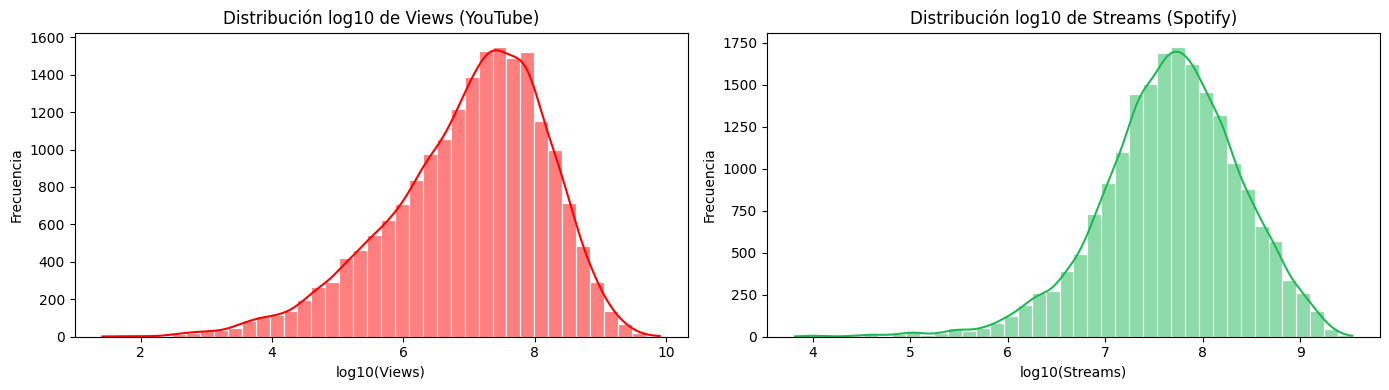

In [80]:
# Distribuciones en escala logarítmica (como en fase 2)
# Nos quedamos solo con valores válidos (no nulos) para cada plataforma
views = data_musica['Views'].dropna() if 'Views' in data_musica.columns else None
streams = data_musica['Stream'].dropna() if 'Stream' in data_musica.columns else None

# Transformación log10 para reducir el sesgo provocado por los outliers
views_log = None
streams_log = None
if views is not None:
    views_log = np.log10(views[views > 0])
if streams is not None:
    streams_log = np.log10(streams[streams > 0])

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=False)

# Histograma + KDE de YouTube usando el rojo característico de la plataforma
if views_log is not None:
    sns.histplot(views_log, bins=40, ax=axes[0], color='#FF0000', edgecolor='white', kde=True)
    axes[0].set_title('Distribución log10 de Views (YouTube)')
    axes[0].set_xlabel('log10(Views)')
    axes[0].set_ylabel('Frecuencia')
else:
    axes[0].set_visible(False)

# Histograma + KDE de Spotify en verde institucional
if streams_log is not None:
    sns.histplot(streams_log, bins=40, ax=axes[1], color='#1DB954', edgecolor='white', kde=True)
    axes[1].set_title('Distribución log10 de Streams (Spotify)')
    axes[1].set_xlabel('log10(Streams)')
    axes[1].set_ylabel('Frecuencia')
else:
    axes[1].set_visible(False)

plt.tight_layout()
plt.show()


### **3.4. Datos inconsistentes**
---
Frente a inconsistencias en los datos, es importante analizar cómo estas discrepancias podrían afectar la comparabilidad y comprensión de la información.

* ¿Cómo se identificaron las inconsistencias en los datos?
* ¿Las inconsistencias son lo suficientemente significativas como para justificar una estandarización?
* ¿Cómo se pueden homogeneizar unidades y formatos para garantizar coherencia en el análisis?
* ¿Qué estrategias se implementaron para abordar las inconsistencias y asegurar la coherencia?
* ¿Se establecieron reglas de validación específicas para garantizar la consistencia?


Para controlar inconsistencias se aplicaron tres reglas de validación sobre variables críticas de popularidad y duración: 
(1) `Likes <= Views`, ya que no es coherente tener más likes que visualizaciones; 
(2) `Views`, `Stream` y `Likes` no negativos; y 
(3) `Duration_ms >= 30000` (30 segundos) para excluir registros anómalos por duración extremadamente corta. 
Estas reglas mejoran la coherencia del conjunto antes de etapas posteriores de preparación y modelado.



In [81]:
# Reglas de consistencia para detectar anomalías
rows_before = data_musica.shape[0]

inconsist_likes_views = data_musica[data_musica['Likes'] > data_musica['Views']]
inconsist_negative = data_musica[
    (data_musica['Views'] < 0) |
    (data_musica['Stream'] < 0) |
    (data_musica['Likes'] < 0)
]
inconsist_duration = data_musica[data_musica['Duration_ms'] < 30000]

print('Registros con Likes > Views:', len(inconsist_likes_views))
print('Registros con valores negativos (Views/Stream/Likes):', len(inconsist_negative))
print('Registros con Duration_ms < 30000:', len(inconsist_duration))
print('')

# Aplicación de filtros de consistencia
mask_likes_views = data_musica['Likes'] <= data_musica['Views']
mask_no_negative = (
    (data_musica['Views'] >= 0) &
    (data_musica['Stream'] >= 0) &
    (data_musica['Likes'] >= 0)
)
mask_duration = data_musica['Duration_ms'] >= 30000

data_musica = data_musica[mask_likes_views & mask_no_negative & mask_duration].copy()

rows_after = data_musica.shape[0]
print('Total filas antes:', rows_before)
print('Total filas despues:', rows_after)
print('Filas eliminadas por inconsistencias:', rows_before - rows_after)



Registros con Likes > Views: 0
Registros con valores negativos (Views/Stream/Likes): 0
Registros con Duration_ms < 30000: 0

Total filas antes: 19549
Total filas despues: 19549
Filas eliminadas por inconsistencias: 0


### **3.5. Datos corruptos**
---
En la detección de datos corruptos, pregunte si hay posibles errores de entrada o problemas de transferencia que podrían haber afectado la integridad de los datos.
* ¿Cómo se determinó la presencia de datos corruptos en el conjunto de datos?
* ¿Qué medidas se tomaron para corregir o eliminar los datos corruptos?
* ¿Hubo casos en los que la corrupción de datos no pudo ser manejada y cómo se justificó esa decisión?


En esta sección se consideran datos corruptos aquellos registros con valores no parseables en columnas numéricas, valores inválidos en variables booleanas y campos de texto críticos vacíos (como `Track` o `Artist`). La estrategia aplicada es primero **diagnosticar y reportar** qué filas presentan anomalías para tomar una decisión informada sobre su corrección o eliminación en el siguiente paso.

**Conclusión:** tras ejecutar las validaciones definidas, no se detectaron datos corruptos en `Track`, `Artist`, `Views`, `Stream`, `Likes`, `Duration_ms`, `Licensed` y `official_video`.



In [ ]:
# Trabajamos sobre una copia para no modificar data_musica en esta etapa
df_check = data_musica.copy()

# 1) Validación de columnas numéricas críticas
numeric_candidates = [
    'Views', 'Stream', 'Likes', 'Duration_ms',
    'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'
]
numeric_cols = [c for c in numeric_candidates if c in df_check.columns]

reglas = {}
for col in numeric_cols:
    parsed = pd.to_numeric(df_check[col], errors='coerce')
    # Marcamos como sospechoso si el valor original no es nulo pero no pudo parsearse
    invalid_mask = df_check[col].notna() & parsed.isna()
    reglas[f'numerico_invalido_{col}'] = invalid_mask

# 2) Validación de booleanas esperadas
for col in ['Licensed', 'official_video']:
    if col in df_check.columns:
        invalid_bool = ~df_check[col].isin([True, False])
        reglas[f'booleano_invalido_{col}'] = invalid_bool

# 3) Texto crítico vacío o ilegible
for col in ['Track', 'Artist']:
    if col in df_check.columns:
        empty_text = df_check[col].isna() | (df_check[col].astype(str).str.strip() == '')
        reglas[f'texto_vacio_{col}'] = empty_text

# Consolidación de filas sospechosas
if reglas:
    reglas_df = pd.DataFrame(reglas)
    filas_corruptas_idx = reglas_df.any(axis=1)
else:
    reglas_df = pd.DataFrame(index=df_check.index)
    filas_corruptas_idx = pd.Series(False, index=df_check.index)

# Reporte de resultados
print('Total filas analizadas:', len(df_check))
print('Total filas sospechosas de corrupción:', int(filas_corruptas_idx.sum()))
print('')

if not reglas_df.empty:
    resumen = reglas_df.sum().sort_values(ascending=False)
    print('Conteo por regla de validación:')
    print(resumen[resumen > 0] if (resumen > 0).any() else 'No se detectaron anomalías por estas reglas.')
else:
    print('No se definieron reglas (faltan columnas esperadas).')

print('')
print('Muestra de filas sospechosas:')
cols_muestra = [c for c in ['Track', 'Artist', 'Views', 'Stream', 'Likes', 'Duration_ms', 'Licensed', 'official_video'] if c in df_check.columns]
display(df_check.loc[filas_corruptas_idx, cols_muestra].head(10))
if int(filas_corruptas_idx.sum()) == 0:
    print('no se detectaron datos corruptos en las columnas Track, Artist, Views, Stream, Likes, Duration_ms, Licensed y official_video, de acuerdo con las reglas definidas.')
else:
    print('se detectaron filas sospechosas y deben revisarse antes de decidir su corrección o eliminación.')




Total filas analizadas: 19549
Total filas sospechosas de corrupción: 0

Conteo por regla de validación:
No se detectaron anomalías por estas reglas.

Muestra de filas sospechosas:


,Track,Artist,Views,Stream,Likes,Duration_ms,Licensed,official_video


no se detectaron datos corruptos en las columnas Track, Artist, Views, Stream, Likes, Duration_ms, Licensed y official_video, de acuerdo con las reglas definidas.


### **3.6. Seleccion de datos**
---
En la selección de datos, reflexione sobre las variables que son realmente relevantes para sus objetivos de análisis.
* ¿Qué criterios se utilizaron para seleccionar los datos relevantes para el análisis?
* ¿Se aplicaron técnicas de muestreo o filtrado para reducir el tamaño del conjunto de datos?
* ¿Cómo se justificó la inclusión o exclusión de ciertas variables en la selección de datos?


Para esta etapa se definieron dos datasets finales, alineados con los objetivos del proyecto: `df_canciones` (vista por canción, después del tratamiento de duplicados) y `df_artistas` (vista agregada por artista). Estas dos vistas son las más relevantes para el análisis propuesto, porque permiten estudiar tanto el desempeño por track como los patrones de consumo y características a nivel de artista.



In [85]:
# Presentación de datasets finales seleccionados para el análisis
required = ['df_canciones', 'df_artistas']
missing = [name for name in required if name not in globals()]

if missing:
    print('Faltan datasets en memoria:', missing)
    print('Ejecuta primero la sección 3.2 para generar df_canciones y df_artistas.')
else:
    print('Datasets finales listos para el análisis:')
    print('df_canciones shape:', df_canciones.shape)
    print('df_artistas shape:', df_artistas.shape)
    print('')

    print('Columnas de df_canciones:')
    print(df_canciones.columns.tolist())
    print('')

    print('Columnas de df_artistas:')
    print(df_artistas.columns.tolist())
    print('')

    print('Muestra df_canciones:')
    display(df_canciones.head(10))
    print('Muestra df_artistas:')
    display(df_artistas.head(10))



Datasets finales listos para el análisis:
df_canciones shape: (19463, 23)
df_artistas shape: (2040, 8)

Columnas de df_canciones:
['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Channel', 'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream', 'Popularity_Class']

Columnas de df_artistas:
['Artist', 'Song_Count', 'Stream', 'Views', 'Likes', 'Danceability', 'Energy', 'Popularity_Class']

Muestra df_canciones:


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Channel,Views,Likes,Comments,Licensed,official_video,Stream,Popularity_Class
0,Coez,!ly (feat. coez),c@ra++ere s?ec!@le,album,0.765,0.726,7.0,-5.260,0.0505,0.24000,...,126.556,206495.0,thaSupremeVEVO,5914604.0,44532.0,814.0,True,True,26314102.0,Medio
1,Thasup,!ly (feat. coez),c@ra++ere s?ec!@le,album,0.765,0.726,7.0,-5.260,0.0505,0.24000,...,126.556,206495.0,thaSupremeVEVO,5914198.0,44528.0,814.0,True,True,26314102.0,Medio
2,Colby o'donis,#1 - colby o'donis remix,#1 (Colby O'Donis Remix),single,0.762,0.864,7.0,-4.686,0.2620,0.09140,...,90.026,137528.0,ColbyODonisVEVO,50109737.0,319099.0,12359.0,True,True,561794.0,Bajo Impacto
3,Aphex twin,#3,Selected Ambient Works Volume II,album,0.167,0.071,6.0,-27.108,0.0410,0.91100,...,143.315,464293.0,"Hi, I'm Ben.",18316658.0,157657.0,3262.0,False,False,45002482.0,Medio
4,Dave matthews band,#41,Crash,album,0.577,0.726,4.0,-8.011,0.0299,0.00199,...,107.416,399800.0,davematthewsbandVEVO,4160936.0,20527.0,1248.0,True,True,34528391.0,Medio
5,Will.i.am,#thatpower,#willpower (Deluxe),album,0.797,0.608,6.0,-6.096,0.0584,0.00112,...,127.999,279507.0,williamVEVO,981442473.0,4673535.0,301321.0,True,True,220604728.0,Mega-Hit
6,Ysy a,#ysya2020 vol. 5 - silbando,#Ysya2020 Vol. 5 - Silbando,single,0.936,0.659,5.0,-7.402,0.1730,0.32700,...,96.515,119438.0,YSY A,1866183.0,35206.0,521.0,True,True,26297019.0,Medio
7,Luciano pavarotti,'o sole mio - live,Pavarotti & Friends 2,album,0.297,0.264,8.0,-12.537,0.0387,0.94300,...,62.074,191507.0,Decca Classics,7477349.0,58140.0,1454.0,False,False,4034033.0,Bajo Impacto
8,Diana krall,'s wonderful,Love Is Here To Stay,album,0.546,0.244,7.0,-12.515,0.0435,0.88500,...,77.248,170187.0,Mirelladue,26028.0,314.0,11.0,False,False,15020069.0,Bajo Impacto
9,Cody johnson,'til you can't,Human The Double Album,album,0.501,0.815,1.0,-4.865,0.0436,0.05130,...,160.087,224213.0,Cody Johnson,42762026.0,248571.0,7006.0,True,True,137178250.0,Hit


Muestra df_artistas:


,Artist,Song_Count,Stream,Views,Likes,Danceability,Energy,Popularity_Class
1487,Post malone,10,1.525126e+10,6.394420e+09,53974744.0,0.669300,0.635000,Mega-Hit
526,Ed sheeran,10,1.439488e+10,1.546021e+10,83543319.0,0.713600,0.608900,Mega-Hit
508,Dua lipa,10,1.340808e+10,8.216339e+09,62627677.0,0.746900,0.734700,Mega-Hit
1844,The weeknd,9,1.246428e+10,6.859509e+09,47299512.0,0.578556,0.639333,Mega-Hit
923,Justin bieber,10,1.209777e+10,1.099106e+10,78584348.0,0.646800,0.600300,Mega-Hit
1992,Xxxtentacion,9,1.201191e+10,2.542795e+09,44118638.0,0.759333,0.516889,Mega-Hit
773,Imagine dragons,10,1.185831e+10,9.093785e+09,72274477.0,0.652000,0.717400,Mega-Hit
383,Coldplay,10,1.177848e+10,9.997278e+09,63157895.0,0.472700,0.570400,Mega-Hit
977,Khalid,10,1.138684e+10,5.398246e+09,46881447.0,0.672400,0.593700,Mega-Hit
270,Bruno mars,10,1.089786e+10,1.024092e+10,59616146.0,0.693300,0.625600,Mega-Hit


## **4. Primer analisis exploratorio (Fase 2)**
---
En esta seccion se integrara el analisis exploratorio realizado en la Fase 2:
- Resumen general y estadistica descriptiva.
- Distribuciones de variables tecnicas y de popularidad.
- Correlaciones iniciales y hallazgos relevantes.


In [13]:
# ---INGRESE SU CODIGO (Integracion Fase 2)---


## **5. Resultados, interpretacion y conclusiones**
---
Use esta seccion para consolidar los hallazgos finales del proyecto:
1. Sintesis de patrones relevantes.
2. Implicaciones para la toma de decisiones.
3. Limitaciones del analisis.
4. Recomendaciones y trabajo futuro.


In [14]:
# ---INGRESE SU CODIGO / DISCUSION FINAL---


## **Créditos**
* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).
    
**Universidad Nacional de Colombia** - *Facultad de Ingeniería*